In [34]:
import pandas as pd
import numpy as np
import pickle

In [2]:
total_crop_dataset = pd.read_csv('../crop_production.csv')

In [3]:
madhya_pradesh = total_crop_dataset[total_crop_dataset['State_Name']=='Madhya Pradesh']

In [4]:
madhya_pradesh.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
102248,Madhya Pradesh,AGAR MALWA,2013,Kharif,Arhar/Tur,1834.0,739.0
102249,Madhya Pradesh,AGAR MALWA,2013,Kharif,Bajra,5.0,4.0
102250,Madhya Pradesh,AGAR MALWA,2013,Kharif,Barley,286.0,466.0
102251,Madhya Pradesh,AGAR MALWA,2013,Kharif,Groundnut,1077.0,1138.0
102252,Madhya Pradesh,AGAR MALWA,2013,Kharif,Jowar,2750.0,3347.0


In [5]:
madhya_pradesh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22943 entries, 102248 to 125190
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     22943 non-null  object 
 1   District_Name  22943 non-null  object 
 2   Crop_Year      22943 non-null  int64  
 3   Season         22943 non-null  object 
 4   Crop           22943 non-null  object 
 5   Area           22943 non-null  float64
 6   Production     22604 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
madhya_pradesh.isnull().sum()

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area               0
Production       339
dtype: int64

In [7]:
madhya_pradesh = madhya_pradesh.dropna()

In [8]:
madhya_pradesh.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [9]:
madhya_pradesh['District_Name'].unique()

array(['AGAR MALWA', 'ALIRAJPUR', 'ANUPPUR', 'ASHOKNAGAR', 'BALAGHAT',
       'BARWANI', 'BETUL', 'BHIND', 'BHOPAL', 'BURHANPUR', 'CHHATARPUR',
       'CHHINDWARA', 'DAMOH', 'DATIA', 'DEWAS', 'DHAR', 'DINDORI', 'GUNA',
       'GWALIOR', 'HARDA', 'HOSHANGABAD', 'INDORE', 'JABALPUR', 'JHABUA',
       'KATNI', 'KHANDWA', 'KHARGONE', 'MANDLA', 'MANDSAUR', 'MORENA',
       'NARSINGHPUR', 'NEEMUCH', 'PANNA', 'RAISEN', 'RAJGARH', 'RATLAM',
       'REWA', 'SAGAR', 'SATNA', 'SEHORE', 'SEONI', 'SHAHDOL', 'SHAJAPUR',
       'SHEOPUR', 'SHIVPURI', 'SIDHI', 'SINGRAULI', 'TIKAMGARH', 'UJJAIN',
       'UMARIA', 'VIDISHA'], dtype=object)

In [10]:
madhya_pradesh['District_Name'].nunique()

51

In [11]:
madhya_pradesh_filtered = madhya_pradesh[
    (madhya_pradesh['Crop']=='Wheat') | 
    (madhya_pradesh['Crop']=='Rice')  |
    (madhya_pradesh['Crop']=='Jowar')  |
    (madhya_pradesh['Crop']=='Bajra')  |
    (madhya_pradesh['Crop']=='Cardamom')  |
    (madhya_pradesh['Crop']=='Garlic')  |
    (madhya_pradesh['Crop']=='Turmeric')  |
    (madhya_pradesh['Crop']=='Ginger')  |
    (madhya_pradesh['Crop']=='Cotton(lint)')  |
    (madhya_pradesh['Crop']=='Linseed')  |
    (madhya_pradesh['Crop']=='Sesamum')  |
    (madhya_pradesh['Crop']=='Coconut ')  |
    (madhya_pradesh['Crop']=='Onion')  |
    (madhya_pradesh['Crop']=='Arhar/Tur')  |
    (madhya_pradesh['Crop']=='Potato')  |
    (madhya_pradesh['Crop']=='Maize')  
]

In [12]:
madhya_pradesh_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9002 entries, 102248 to 125188
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     9002 non-null   object 
 1   District_Name  9002 non-null   object 
 2   Crop_Year      9002 non-null   int64  
 3   Season         9002 non-null   object 
 4   Crop           9002 non-null   object 
 5   Area           9002 non-null   float64
 6   Production     9002 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 562.6+ KB


In [13]:
madhya_pradesh_filtered_ohe = pd.get_dummies(madhya_pradesh_filtered, columns=['District_Name', 'Season','Crop'],drop_first=True)

In [14]:
madhya_pradesh_filtered_ohe.head()

,State_Name,Crop_Year,Area,Production,District_Name_ALIRAJPUR,District_Name_ANUPPUR,District_Name_ASHOKNAGAR,District_Name_BALAGHAT,District_Name_BARWANI,District_Name_BETUL,...,Crop_Garlic,Crop_Jowar,Crop_Linseed,Crop_Maize,Crop_Onion,Crop_Potato,Crop_Rice,Crop_Sesamum,Crop_Turmeric,Crop_Wheat
102248,Madhya Pradesh,2013,1834.0,739.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102249,Madhya Pradesh,2013,5.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102252,Madhya Pradesh,2013,2750.0,3347.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
102253,Madhya Pradesh,2013,15270.0,16578.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
102256,Madhya Pradesh,2013,2.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
madhya_pradesh_filtered_ohe[(madhya_pradesh_filtered_ohe['Area']==15270.)].transpose()

,102253
State_Name,Madhya Pradesh
Crop_Year,2013
Area,15270
Production,16578
District_Name_ALIRAJPUR,0
...,...
Crop_Potato,0
Crop_Rice,0
Crop_Sesamum,0
Crop_Turmeric,0


In [33]:
madhya_pradesh_filtered_ohe.columns

Index(['State_Name', 'Crop_Year', 'Area', 'Production',
       'District_Name_ALIRAJPUR', 'District_Name_ANUPPUR',
       'District_Name_ASHOKNAGAR', 'District_Name_BALAGHAT',
       'District_Name_BARWANI', 'District_Name_BETUL', 'District_Name_BHIND',
       'District_Name_BHOPAL', 'District_Name_BURHANPUR',
       'District_Name_CHHATARPUR', 'District_Name_CHHINDWARA',
       'District_Name_DAMOH', 'District_Name_DATIA', 'District_Name_DEWAS',
       'District_Name_DHAR', 'District_Name_DINDORI', 'District_Name_GUNA',
       'District_Name_GWALIOR', 'District_Name_HARDA',
       'District_Name_HOSHANGABAD', 'District_Name_INDORE',
       'District_Name_JABALPUR', 'District_Name_JHABUA', 'District_Name_KATNI',
       'District_Name_KHANDWA', 'District_Name_KHARGONE',
       'District_Name_MANDLA', 'District_Name_MANDSAUR',
       'District_Name_MORENA', 'District_Name_NARSINGHPUR',
       'District_Name_NEEMUCH', 'District_Name_PANNA', 'District_Name_RAISEN',
       'District_Name_RA

In [15]:
madhya_pradesh_filtered_ohe.isnull().sum()

State_Name                 0
Crop_Year                  0
Area                       0
Production                 0
District_Name_ALIRAJPUR    0
                          ..
Crop_Potato                0
Crop_Rice                  0
Crop_Sesamum               0
Crop_Turmeric              0
Crop_Wheat                 0
Length: 68, dtype: int64

In [16]:
X = madhya_pradesh_filtered_ohe.drop(['State_Name','Crop_Year','Production'],axis=1).values

In [17]:
y = madhya_pradesh_filtered_ohe.iloc[:,3].values

In [18]:
y

array([ 739.,    4., 3347., ..., 1562., 2561.,  124.])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
from sklearn.linear_model import LinearRegression,Lasso
linear_regression = LinearRegression()
lasso = Lasso()

In [22]:
linear_regression.fit(X_train,y_train)
lasso.fit(X_train,y_train)

C:\Users\CHATANAYA\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83531839498.90918, tolerance: 3239557637.443184
  positive)


Lasso()

In [23]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor()

In [24]:
rfregressor.fit(X_train,y_train)

RandomForestRegressor()

In [25]:
y_pred = rfregressor.predict(X_test)

In [26]:
accuracy = rfregressor.score(X_test,y_test)
print(accuracy*100,'%')

87.23471997572943 %


In [27]:
accuracy = linear_regression.score(X_test,y_test)
print(accuracy*100,'%')

77.81701253864362 %


In [28]:
accuracy = lasso.score(X_test,y_test)
print(accuracy*100,'%')

77.81509112568827 %


In [35]:
filename = 'Madhya_Pradesh_Model.sav'
pickle.dump(rfregressor, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
result

0.8723471997572944

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
#cross_val_score(RandomForestRegressor(),X,y,cv=5)

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

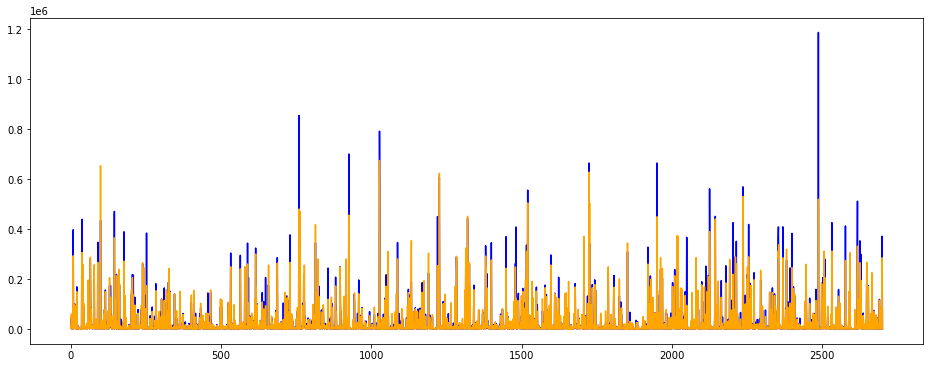

In [32]:
plt.figure(figsize=(16,6))
plt.plot(y_test,color='blue')
plt.plot(y_pred,color='orange')